<a href="https://colab.research.google.com/github/cathyxinchangli/ATMS-597-SP-2020/blob/master/ATMS-597-SP-2020-Project-2/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TBA 
# (I'm not very good with code documentation e.g. common practices etc. so any help is appreciated! - XL)

import requests
import pandas as pd
import datetime
from IPython import display # for updating the cell dynamically

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.
    
    Parameters:
        - endpoint: The endpoint of the API you want to 
                    make a GET request to.
        - payload: A dictionary of data to pass along 
                   with the request.
    
    Returns:
        Response object.
    ---
    S. Moline, 'Hands on Data Analysis with Pandas'
    https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/blob/master/ch_04/0-weather_data_collection.ipynb
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}',
        headers={
            'token': 'HfZphTTGbXckpmEuqevAXQZFRCTEJgkJ' # obtained by X. Li, 2/4/2020
        },
        params=payload
    )

# def fetch_data(locationid, startdate, enddate, endpoint="data", #datatypeid="TOBS",
#                datasetid="GHCND", stationid=None, units="metric", limit=1000):
#     '''
#     TBD
#     '''
#     response = make_request(
#         endpoint,
#         {
#             "datasetid": datasetid,
#             "datatypeid": "TMIN",
# #           "datatypeid": 'TMIN',
#             "locationid": locationid,
#             "stationid": stationid,
#             "startdate": startdate,
#             "enddate": enddate,
#             "unit": units,
#             "limit": limit,
#         })
#     response = pd.DataFrame(response.json()["results"])
#     return response

current = datetime.date(2018, 1, 1)
end = datetime.date(2019, 1, 1)

results = []

while current < end:
    # update the cell with status information
    display.clear_output(wait=True)
    display.display(f'Gathering data for {str(current)}')
    
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : ['TMAX','TMIN'],
            'locationid' : 'CITY:US360019', # NYC
            'stationid' : 'GHCND:USC00280907',
            'startdate' : current,
            'enddate' : current,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        })

    if response.ok:
        # we extend the list instead of appending to avoid getting a nested list
        results.extend(response.json()['results'])

    # update the current date to avoid an infinite loop
    current += datetime.timedelta(days=1)

def clean_up(datain,key):
    '''
    TBD
    credit S. Nesbitt
    '''
    datain[key][(datain[key] == 9999)] = None
    datain[key]= datain[key].astype('float')
    return datain

'Gathering data for 2018-12-31'

In [4]:
df = pd.DataFrame(results)
df

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,TMAX,GHCND:USC00280907,",,7,0700",-10.6
1,2018-01-01T00:00:00,TMIN,GHCND:USC00280907,",,7,0700",-15.6
2,2018-01-02T00:00:00,TMAX,GHCND:USC00280907,",,7,0700",-8.3
3,2018-01-02T00:00:00,TMIN,GHCND:USC00280907,",,7,0700",-16.1
4,2018-01-03T00:00:00,TMAX,GHCND:USC00280907,",,7,0700",-4.4
...,...,...,...,...,...
725,2018-12-29T00:00:00,TMIN,GHCND:USC00280907,",,7,0700",5.0
726,2018-12-30T00:00:00,TMAX,GHCND:USC00280907,",,7,0700",8.9
727,2018-12-30T00:00:00,TMIN,GHCND:USC00280907,",,7,0700",0.6
728,2018-12-31T00:00:00,TMAX,GHCND:USC00280907,",,7,0700",3.3


In [0]:
# # fetch data for the city of New York in year
# fetch_data("CITY:US360019", datetime.date(2018, 1, 1), datetime.date(2019, 1, 1), stationid = 'GHCND:USC00280907')#, datatypeid='TMIN')
# # Tmax = fetch_data("CITY:US360019", datetime.date(2018, 1, 1), datetime.date(2019, 1, 1), datatypeid='TMAX')
# # Tmin, Tmax

In [5]:
# clean up data for missing values (as represented by '9999' according to 
# GHCND documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
df = clean_up(df, 'value')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.index = df['date']
df
# Tmin = clean_up(Tmin, 'value')
# Tmax = clean_up(Tmax, 'value')
# Tmin, Tmax

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,datatype,station,attributes,value
date,,,,,
2018-01-01,2018-01-01,TMAX,GHCND:USC00280907,",,7,0700",-10.6
2018-01-01,2018-01-01,TMIN,GHCND:USC00280907,",,7,0700",-15.6
2018-01-02,2018-01-02,TMAX,GHCND:USC00280907,",,7,0700",-8.3
2018-01-02,2018-01-02,TMIN,GHCND:USC00280907,",,7,0700",-16.1
2018-01-03,2018-01-03,TMAX,GHCND:USC00280907,",,7,0700",-4.4
...,...,...,...,...,...
2018-12-29,2018-12-29,TMIN,GHCND:USC00280907,",,7,0700",5.0
2018-12-30,2018-12-30,TMAX,GHCND:USC00280907,",,7,0700",8.9
2018-12-30,2018-12-30,TMIN,GHCND:USC00280907,",,7,0700",0.6


In [6]:
# resample to be weekly average:
df2 = df.resample('W').mean() #'W': weekly frequency
df2

,value
date,
2018-01-07,-11.392857
2018-01-14,-1.442857
2018-01-21,-4.242857
2018-01-28,1.857143
2018-02-04,-1.228571
2018-02-11,-1.742857
2018-02-18,3.564286
2018-02-25,6.357143
2018-03-04,5.435714


In [0]:
# # Calculate T_avg = (T_max + T_min)/2
# Tavg = (Tmin['value'] + Tmax['value'])/2
# Tavg

0     -131.0
1     -114.0
2     -111.0
3     -158.0
4     -119.0
       ...  
995     25.5
996     33.5
997     22.5
998     36.5
999     17.0
Name: value, Length: 1000, dtype: float64

In [33]:
# Plotting
# copied from https://matplotlib.org/matplotblog/posts/warming-stripes/

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

# time period
FIRST = datetime.date(2018, 1, 1)
LAST = datetime.date(2019, 1, 1)  # inclusive

# Reference period for the center of the color scale
FIRST_REFERENCE = datetime.date(2018, 3, 1)
LAST_REFERENCE = datetime.date(2018, 5, 1)
#LIM = 0.7 # degrees

measured = df2.loc[FIRST:LAST, 'value'].dropna()
reference = measured.loc[FIRST_REFERENCE:LAST_REFERENCE].mean()
anomaly = (measured - reference)/10

anomaly
#np.shape(reference)


date
2018-01-07   -1.642222
2018-01-14   -0.647222
2018-01-21   -0.927222
2018-01-28   -0.317222
2018-02-04   -0.625794
2018-02-11   -0.677222
2018-02-18   -0.146508
2018-02-25    0.132778
2018-03-04    0.040635
2018-03-11   -0.376508
2018-03-18   -0.395794
2018-03-25   -0.291508
2018-04-01    0.022063
2018-04-08   -0.125794
2018-04-15    0.302778
2018-04-22    0.132063
2018-04-29    0.692063
2018-05-06    1.147063
2018-05-13    0.999921
2018-05-20    1.052778
2018-05-27    1.559921
2018-06-03    1.541349
2018-06-10    1.303492
2018-06-17    1.368492
2018-06-24    1.746349
2018-07-01    1.786349
2018-07-08    2.072063
2018-07-15    1.869921
2018-07-22    1.819206
2018-07-29    1.999206
2018-08-05    1.918492
2018-08-12    2.092778
2018-08-19    1.969921
2018-08-26    1.587778
2018-09-02    1.980635
2018-09-09    1.927063
2018-09-16    1.370635
2018-09-23    1.588492
2018-09-30    1.130635
2018-10-07    1.263492
2018-10-14    1.247063
2018-10-21    0.437063
2018-10-28    0.119921
2018-1

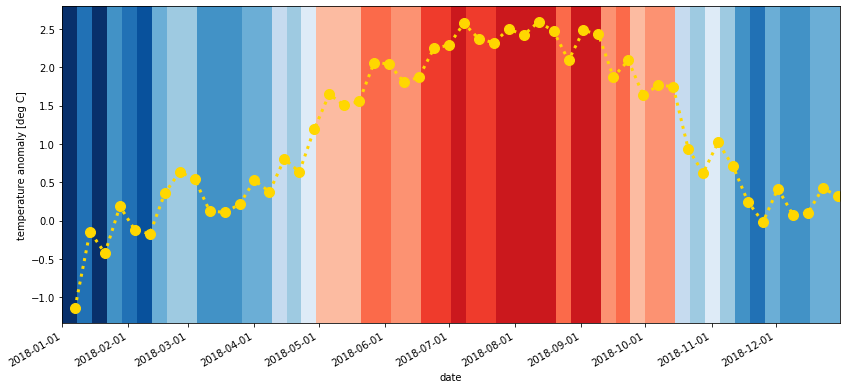

In [65]:
# the colors in this colormap come from http://colorbrewer2.org
# the 8 more saturated colors from the 9 blues / 9 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(12, 5))

####### NEED TO MODIFY ######
ax = fig.add_axes([0.1, 0.12, 0.9, 0.88])
#ax.set_axis_off() # if user chooses to overlay data on top of the strips, we need the axes.
#############################

import matplotlib.dates as mdates

date_str_list = ['{}'.format(d) for d in df['date'][0:730:2]]
date_corrected = mdates.datestr2num(date_str_list)

min_temp = df2.loc[:,'value'].min()/10 # deg C
max_temp = df2.loc[:,'value'].max()/10 # deg C
temp_delta = max_temp - min_temp # deg C
buffer = 0.2 # deg C

col = PatchCollection([
    Rectangle((y, min_temp-buffer), 7, temp_delta+2*buffer) # need to change 7 to other values when resampled at other frequencies
    for y in date_corrected.astype(int)[::7]
]) 

# set data, colormap and color limits
col.set_array(anomaly)
col.set_cmap(cmap)
#col.set_clim(reference/10 - LIM, reference/10 + LIM) #??
col.set_clim(min_temp, max_temp)
ax.add_collection(col)

ax.set_ylim(min_temp-buffer, max_temp+buffer)
ax.set_xlim(date_corrected[0], date_corrected[-1])
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

# flag needs to come into play here
ax.plot(df2['value']/10,':o',color='gold',linewidth=3, markersize=10)
ax.set_xlabel('date')
ax.set_ylabel('temperature anomaly [deg C]')

fig.savefig('warming-stripes.png')
fig.show()

In [27]:
# junk

import matplotlib.dates as mdates

date_str_list = ['{}'.format(d) for d in df['date'][0:730:2]]
date_corrected = mdates.datestr2num(date_str_list)
#np.shape(date_corrected.astype(int)[6::7])
date = mdates.num2date(date_corrected)
date[6::7]

[datetime.datetime(2018, 1, 7, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 1, 14, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 1, 21, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 1, 28, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 2, 4, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 2, 11, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 2, 18, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 2, 25, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 3, 4, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 3, 11, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 3, 18, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 3, 25, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 4, 1, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 4, 8, 0, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2018, 4, 15, 0, 0, t

# Junk from before

In [0]:
# documentation of GHCN (Global Historical Climatology Network) – Daily Documentation: 
# https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

# getting station information (not sure if this is necessary)
!wget https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt

--2020-02-05 22:21:43--  https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt
Resolving www1.ncdc.noaa.gov (www1.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.177, 205.167.25.178, ...
Connecting to www1.ncdc.noaa.gov (www1.ncdc.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9896966 (9.4M) [text/plain]
Saving to: ‘ghcnd-stations.txt’

ghcnd-stations.txt  100%[===================>]   9.44M  8.57MB/s    in 1.1s    

2020-02-05 22:21:44 (8.57 MB/s) - ‘ghcnd-stations.txt’ saved [9896966/9896966]



In [0]:
!head -20 ghcnd-stations.txt

ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       
ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    
AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196
AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194
AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217
AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218
AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930
AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938
AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948
AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990
AG000060390  36.7167    3.2500   24.0    ALGER-DAR EL BEIDA             GSN     60390
AG000060590  30.5667    2.8667  397.0    EL-GOLEA     

In [0]:
stations = pd.read_fwf('ghcnd-stations.txt',names=['ID','LAT [deg]','LON [deg]','ELV [m]','NAME','col5','col6','col7']) # I don't know what the last three columns are...
stations

,ID,LAT [deg],LON [deg],ELV [m],NAME,col5,col6,col7
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0
...,...,...,...,...,...,...,...,...
115076,ZI000067969,21.0500,29.3670,861.0,WEST NICHOLSON,NaN,NaN,67969.0
115077,ZI000067975,20.0670,30.8670,1095.0,MASVINGO,NaN,NaN,67975.0
115078,ZI000067977,21.0170,31.5830,430.0,BUFFALO RANGE,NaN,NaN,67977.0
115079,ZI000067983,20.2000,32.6160,1132.0,CHIPINGE,NaN,GSN,67983.0


In [0]:
stations['ELV [m]'].describe()

count    115081.000000
mean        447.756902
std         667.260086
min        -999.900000
25%          80.000000
50%         256.000000
75%         610.000000
max        5033.000000
Name: ELV [m], dtype: float64

In [0]:
stations[:][stations['ELV [m]'] > 4000]

,ID,LAT [deg],LON [deg],ELV [m],NAME,col5,col6,col7
17498,AYM00089577,80.3700,77.3700,4084.0,DOME PLATEAU DOME A,NaN,GSN,89577.0
17651,BLM00085201,16.5130,-68.1920,4061.5,EL ALTO INTL,NaN,NaN,85201.0
32718,CHM00055228,32.5000,80.0830,4280.0,SHIQUANHE,NaN,NaN,55228.0
32719,CHM00055279,31.3670,90.0170,4701.0,BAINGOIN,NaN,NaN,55279.0
32720,CHM00055299,31.4830,92.0670,4508.0,NAGQU,NaN,NaN,55299.0
32721,CHM00055472,30.9500,88.6330,4670.0,XAINZA,NaN,NaN,55472.0
32724,CHM00056004,34.2170,92.4330,4535.0,TUOTUOHE,NaN,NaN,56004.0
32725,CHM00056021,34.1330,95.7830,4176.0,QUMARLEB,NaN,NaN,56021.0
32727,CHM00056033,34.9170,98.2170,4273.0,MADOI,NaN,NaN,56033.0
32732,CHM00056106,31.8830,93.7830,4024.0,SOG XIAN,NaN,NaN,56106.0


In [0]:
stations['ID'] == 'US360019'

0         False
1         False
2         False
3         False
4         False
          ...  
115076    False
115077    False
115078    False
115079    False
115080    False
Name: ID, Length: 115081, dtype: bool

In [0]:
stations[:][stations['ID'] == 'US000360019']

,ID,LAT [deg],LON [deg],ELV [m],NAME,col5,col6,col7


In [0]:
make_request("stations")

<Response [200]>

In [0]:
import datetime

from IPython import display # for updating the cell dynamically

current = datetime.date(2018, 1, 1)
end = datetime.date(2019, 1, 1)

results = []

while current < end:
    # update the cell with status information
    display.clear_output(wait=True)
    display.display(f'Gathering data for {str(current)}')
    
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'locationid' : 'CITY:US360019', # NYC
            'startdate' : current,
            'enddate' : current,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )

    if response.ok:
        # we extend the list instead of appending to avoid getting a nested list
        results.extend(response.json()['results'])

    # update the current date to avoid an infinite loop
    current += datetime.timedelta(days=1)

'Gathering data for 2018-12-31'

In [0]:
df = pd.DataFrame(results)
df

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0
...,...,...,...,...,...
79866,2018-12-31T00:00:00,WDF5,GHCND:USW00094789,",,W,",130.0
79867,2018-12-31T00:00:00,WSF2,GHCND:USW00094789,",,W,",9.8
79868,2018-12-31T00:00:00,WSF5,GHCND:USW00094789,",,W,",12.5
79869,2018-12-31T00:00:00,WT01,GHCND:USW00094789,",,W,",1.0
